# LAUTAT with lumped vortex representation of the aerofoil

In [1]:
include("../src/UNSflow.jl")
using UNSflow

Case details:
A flat plate undergoes a pitch-ramp-hold maneuver of amplitude 25 deg, reduced frequency 0.11 and smoothing parameter 11. The resulting pitch history is shown below
The maneuver is generated using the "Eldredge function". See the publication for more details. It consists of an upward ramp from 0 to 25 deg, a hold at 25 deg, and a downward ramp from 25 deg to 0. The code below shows how to implement this is UNSflow.
In [2]:


In [4]:
using PyPlot

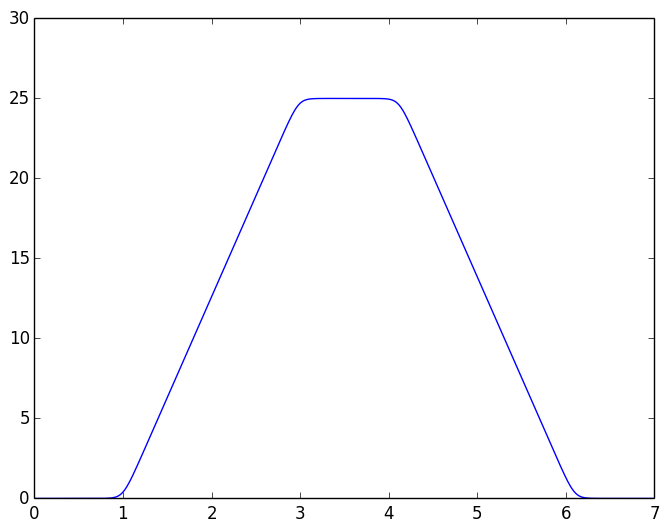

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318f30490>

In [5]:
#Nondimensional time
t = 0:0.01:7

#Declare an empty array for pitch angle, same length as time
alpha = zeros(length(t))

#Functional definition of the eldredge function. First argument is amplitude in radians, second is reduced frequency, third is smoothing parameter. 
alphadef = EldRampReturnDef(25*pi/180,0.11,11)

#Generate values of alpha at the times required. 
for i = 1:length(t)
    #Tip : Julia does not benefit from vectorisation like MATLAB. As the code is compiled, it is always better to use full loops   
    alpha[i] = alphadef(t[i])
end
#The PyPlot library in Julia is loaded is loaded with UNSflow and used for plots
plot(t,alpha*180/pi)

#xlabel("Nondimensional time")
#ylabel("alpha (deg)")

#To use latex symbols in the labels, uncomment and try the following: (issues with this, ignore for now)
#xlabel(L"$t^*$")
#ylabel(L"$\alpha$ (deg)")

In [6]:
#Define pitch angle as described above
alphadef = EldRampReturnDef(25*pi/180,0.11,11)

#Plunge magnitude is constant = 0
hdef = ConstDef(0.)

#Freestream velocity is a constant. Set as constant = 1
udef = ConstDef(1.)

#The full kinematics are collected as:
full_kinem = KinemDef(alphadef, hdef, udef)

UNSflow.KinemDef(UNSflow.EldRampReturnDef(0.4363323129985824,0.11,11.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0))

## First simulate with Fourier TAT representation and compare

In [7]:
pvt = 0.0 #leading edge

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("FlatPlate", pvt, full_kinem)

curfield = TwoDFlowField()

time_total = 7. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat, surf, curfield = lautat(surf, curfield, nsteps)





(
[0.015 3.88004e-12 … -2.42165e-10 0.00168206; 0.03 5.39695e-12 … -2.42155e-10 2.86646e-5; … ; 6.99 3.05084e-11 … -0.00898878 -0.0534365; 7.005 2.19333e-11 … -0.00890312 -0.0531465],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldRampReturnDef(0.4363323129985824,0.11,11.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(2.1933279129683904e-11,0.0,-4.82530581570466e-10,0.0,1.0,0.0),[-8.005,-8.00448,-8.00293,-8.00034,-7.9967

## Now run with LV representation 

In [18]:
surf = TwoDSurfLV("FlatPlate", pvt, full_kinem, tevloc = 0.5)

curfield = TwoDFlowField()

time_total = 7. #Required total time
nsteps = Int(round(time_total/0.015))

#Now the code is run as :
#The variables mat, surf and curfield are returned
mat_lv, surf_lv, curfield_lv = lautat(surf, curfield, nsteps)



(
[0.015 3.88004e-12 … -9.07145e-22 -1.5438e-9; 0.03 5.39695e-12 … -1.34597e-21 5.15802e-11; … ; 6.99 3.05084e-11 … 0.01013 -0.0787797; 7.005 2.19333e-11 … 0.0100675 -0.0787557],

UNSflow.TwoDSurfLV(1.0,1.0,"FlatPlate",0.0,70,"Cosine",UNSflow.KinemDef(UNSflow.EldRampReturnDef(0.4363323129985824,0.11,11.0),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.000503467,0.00201285,0.00452512,0.00803521,0.012536,0.0180186,0.0244717,0.0318826,0.0402361  …  0.959764,0.968117,0.975528,0.981981,0.987464,0.991965,0.995475,0.997987,0.999497,1.0],UNSflow.KinemPar(2.1933279129683904e-11,0.0,-4.82530581570466e-10,0.0,1.0,0.0),[-7.005,0.0],0.5,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.

## Compare results from the two methods

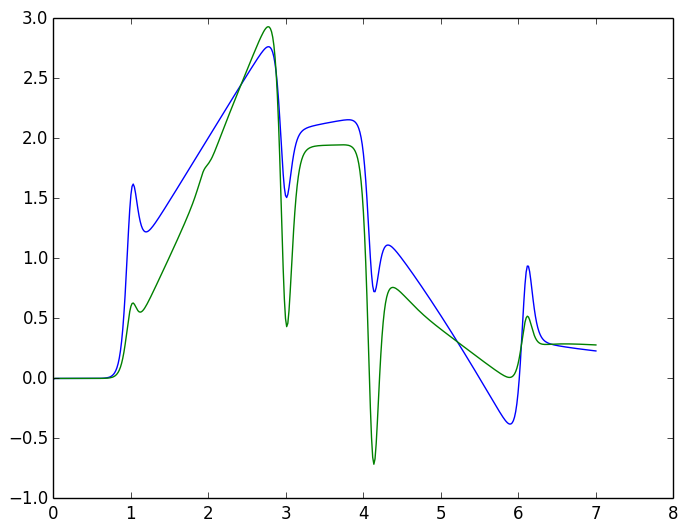

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319f2ea10>

In [19]:
plot(mat[:,1], mat[:,6])
plot(mat_lv[:,1], mat_lv[:,6])

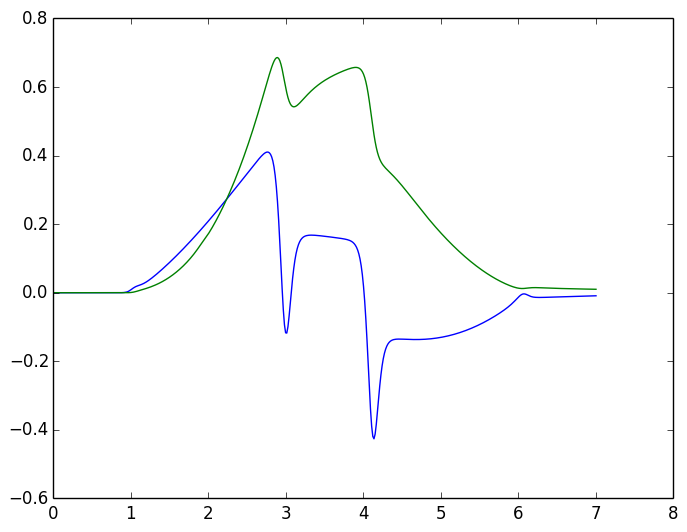

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31969db50>

In [11]:
plot(mat[:,1], mat[:,7])
plot(mat_lv[:,1], mat_lv[:,7])

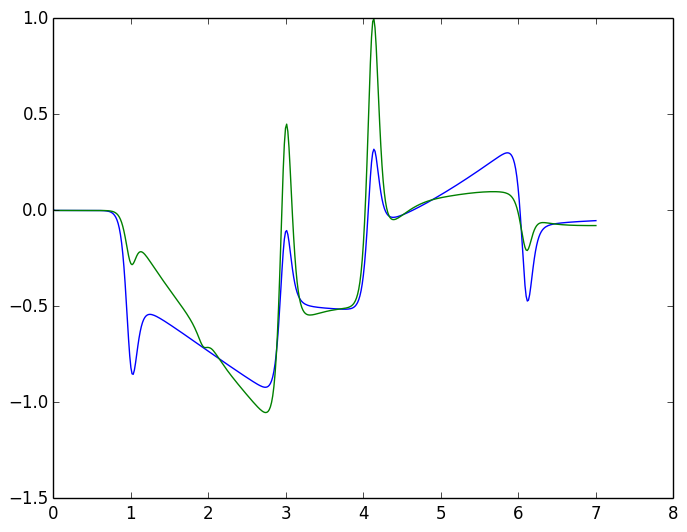

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3198cc790>

In [12]:
plot(mat[:,1], mat[:,8])
plot(mat_lv[:,1], mat_lv[:,8])

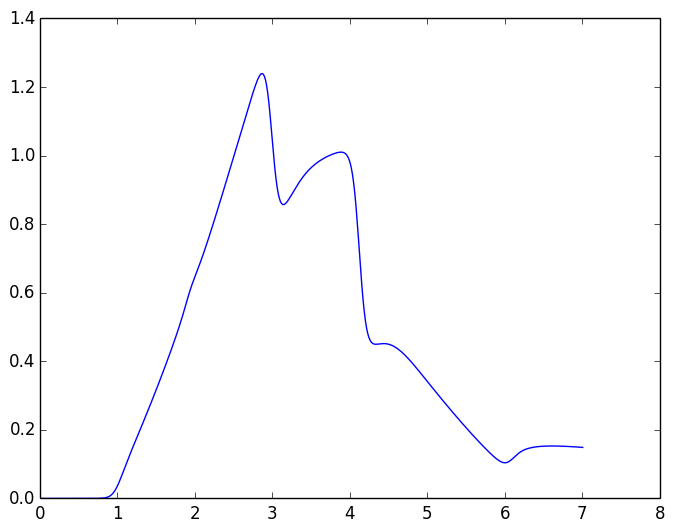

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a15ddd0>

In [20]:
plot(mat_lv[:,1],mat_lv[:,5])

## The difference in the acceleration peaks needs to be examined more closely. It appears that the positive peaks are smaller and the negative peaks are larger in magnitude. 